In [1]:
# Code to create boxplots for CMIP6 ensemble + observational data
# Author: Nathan Erickson
# Date: 11/1/2021
# Coded with Python 3.8.10

In [2]:
# Module importing; directory management

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path = '/home/nathane1/Thesis/output'
if not os.getcwd().endswith('output'):
    os.chdir(path)
print(os.getcwd())

/home/nathane1/Thesis/output


In [3]:
# Read in data, do some partitioning

data = pd.read_csv('ens_averages.csv', index_col = 'Datetimes') #<- For historical comparison with ERSST
ERSST = pd.read_csv('djf_ERSSTv5.csv', index_col='Unnamed: 0')
ERSST.index = ERSST.index.rename('Datetimes')

In [10]:
# This needs to be generalized
eli_nino_models = data.T.loc[[(np.mean(data[model].values.astype(float)) > 165) for model in data]]
eli_neutral_models = data.T.loc[[(np.mean(data[model].values.astype(float)) > 160) & (np.mean(data[model].values.astype(float)) < 165) for model in data]]
eli_nina_models = data.T.loc[[(np.mean(data[model].values.astype(float)) < 160) for model in data]]

# Uncomment these lines for historical comparisons with ERSST data

eli_nino_models = pd.concat([eli_nino_models,ERSST.T])
eli_nina_models = pd.concat([eli_nina_models,ERSST.T])

In [12]:
eli_nino_sortmodels = eli_nino_models.T[list(eli_nino_models.T.median().sort_values(ascending = False).index)]
eli_neutral_sortmodels = eli_neutral_models.T[list(eli_neutral_models.T.median().sort_values(ascending = False).index)].loc[:,~eli_neutral_models.T.columns.duplicated()]
#eli_neutral_models = eli_neutral_models.append(ERSST.T) <- Something is fishy with this line; probably something became deprecated
eli_nina_sortmodels = eli_nina_models.T[list(eli_nina_models.T.median().sort_values(ascending = False).index)]

In [14]:
#eli_nina_sortmodels.insert(3, 'ERSST_v5', eli_nina_sortmodels.pop('ERSST_v5'))
len(eli_nina_sortmodels.T)
for df in eli_nino_sortmodels, eli_neutral_sortmodels, eli_nina_sortmodels:
    df.insert((len(df.T) - 1), 'ERSST_v5', df.pop('ERSST_v5'))

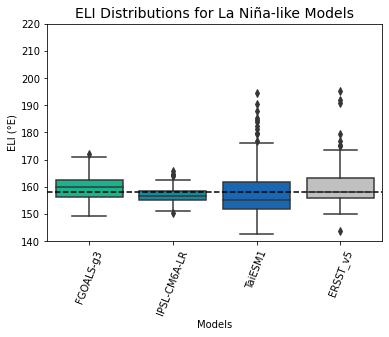

In [16]:
# Create boxplot of data

la_nina_box = sns.boxplot(data = eli_nina_sortmodels, palette = 'winter_r')
la_nina_box.set_ybound(140,220)
la_nina_box.axhline(np.median(eli_nina_sortmodels['ERSST_v5']), ls = '--', color = 'k')
#la_nina_box.set_title('Distribution of ELI Values for La Niña-like Models compared with ERSST_v5', 
#                     size = 14, loc = 'center')
la_nina_box.set_title('ELI Distributions for La Niña-like Models', 
                     size = 14, loc = 'center')
la_nina_box.set_xticklabels(la_nina_box.get_xticklabels(),rotation = 69)
la_nina_box.set(xlabel = 'Models', ylabel = 'ELI (°E)')
ersst_box = la_nina_box.patches[len(eli_nina_sortmodels.T)-1]
ersst_box.set_facecolor('silver')

fig_dir = '/home/nathane1/Thesis/paper_images'
os.chdir(fig_dir)

la_nina_fig = la_nina_box.get_figure()
#la_nina_fig.savefig('la_nina_boxplot.jpg', bbox_inches = 'tight')

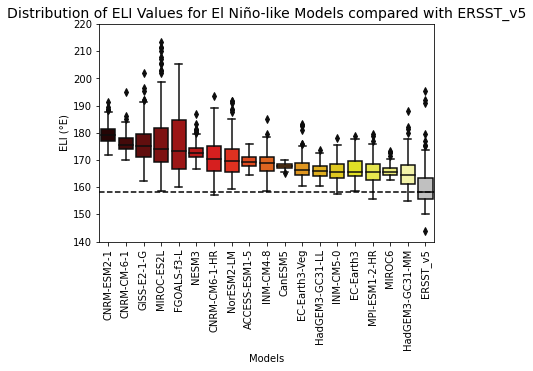

In [17]:
el_nino_box = sns.boxplot(data = eli_nino_sortmodels, palette = 'hot')
el_nino_box.set_ybound(140,220)
el_nino_box.axhline(np.median(eli_nino_sortmodels['ERSST_v5']), ls = '--', color = 'k')
el_nino_box.set_title('Distribution of ELI Values for El Niño-like Models compared with ERSST_v5', 
                     size = 14, loc = 'center')
#el_nino_box.set_title('ELI Distributions for El Niño-like Models', 
#                     size = 14, loc = 'center')
el_nino_box.set_xticklabels(el_nino_box.get_xticklabels(),rotation = 90)
el_nino_box.set(xlabel = 'Models', ylabel = 'ELI (°E)')
ersst_box = el_nino_box.patches[len(eli_nino_sortmodels.T)-1]
ersst_box.set_facecolor('silver')

os.chdir(fig_dir)

el_nino_fig = el_nino_box.get_figure()
#el_nino_fig.savefig('el_nino_boxplot.jpg', bbox_inches = 'tight')

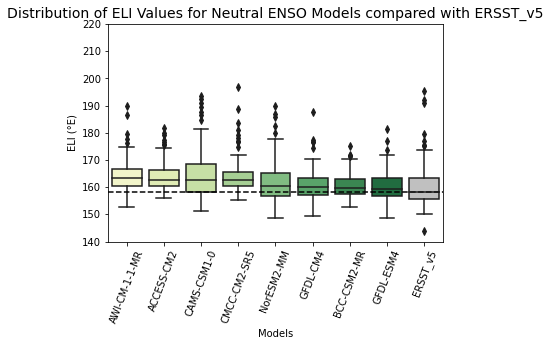

In [18]:
neutral_box = sns.boxplot(data = eli_neutral_sortmodels, palette = 'YlGn')
neutral_box.set_ybound(140,220)
neutral_box.axhline(np.median(eli_neutral_sortmodels['ERSST_v5']), ls = '--', color = 'k')
neutral_box.set_title('Distribution of ELI Values for Neutral ENSO Models compared with ERSST_v5', 
                     size = 14, loc = 'center')
neutral_box.set_xticklabels(neutral_box.get_xticklabels(),rotation = 69)
neutral_box.set(xlabel = 'Models', ylabel = 'ELI (°E)')
ersst_box = neutral_box.patches[len(eli_neutral_sortmodels.T)-1]
ersst_box.set_facecolor('silver')

os.chdir(fig_dir)

neutral_fig = neutral_box.get_figure()
#neutral_fig.savefig('neutral_boxplot.jpg', bbox_inches = 'tight')

In [22]:
# Read in data for Niño 3.4

os.chdir('/home/nathane1/Thesis')
niño_table = pd.read_csv('output/monthly_niño_averaged.csv', index_col = 'Unnamed: 0')
ERSST_niño = pd.read_csv('output/monthly_ERSST_niño.csv', index_col = 'Unnamed: 0')
niño_table = niño_table[4:171].join(ERSST_niño)

In [30]:
el_nino_models = niño_table.T.loc[[model for model in (eli_nino_sortmodels.columns & niño_table.columns)]]
la_nina_models = niño_table.T.loc[[model for model in (eli_nina_sortmodels.columns & niño_table.columns)]]
neutral_models = niño_table.T.loc[[model for model in (eli_neutral_sortmodels.columns & niño_table.columns)]]

el_nino_sortmodels = el_nino_models.T[list(el_nino_models.T.median().sort_values(ascending = False).index)]
neutral_sortmodels = neutral_models.T[list(neutral_models.T.median().sort_values(ascending = False).index)]
la_nina_sortmodels = la_nina_models.T[list(la_nina_models.T.median().sort_values(ascending = False).index)]

#el_nino_models = el_nino_sortmodels[4:171].join(ERSST_niño)
#neutral_models = neutral_sortmodels[4:171].join(ERSST_niño)
#la_nina_models = la_nina_sortmodels[4:171].join(ERSST_niño)

/tmp/ipykernel_2137815/193004600.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  el_nino_models = niño_table.T.loc[[model for model in (eli_nino_sortmodels.columns & niño_table.columns)]]
/tmp/ipykernel_2137815/193004600.py:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  la_nina_models = niño_table.T.loc[[model for model in (eli_nina_sortmodels.columns & niño_table.columns)]]
/tmp/ipykernel_2137815/193004600.py:3: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  neutral_models = niño_table.T.loc[[model for model in (eli_neutral_sortmodels.columns & niño_table.columns)]

In [31]:
el_nino_sortmodels

FGOALS-f3-L  MIROC-ES2L  MPI-ESM1-2-HR  NorESM2-LM  EC-Earth3  \
1854-1855     0.021459   -0.290316       0.016626    0.277048   0.030380   
1855-1856     0.004135    0.373746       0.132338   -0.126394  -0.226646   
1856-1857     0.025863   -0.172040      -0.260448   -0.162522  -0.015163   
1857-1858    -0.074356   -0.029096       0.222513    0.045700   0.120098   
1858-1859    -0.056493    0.287676       0.198439   -0.195313   0.062339   
...                ...         ...            ...         ...        ...   
2016-2017    -0.124316   -0.200175       0.153039    0.131440  -0.013052   
2017-2018    -0.084538    0.042429       0.110681    0.020172  -0.117704   
2018-2019    -0.161866   -0.072391      -0.088101    0.117772  -0.156107   
2019-2020     0.084293    0.157609      -0.047795    0.194102  -0.199882   
2020-2021     0.117756    0.280769       0.124224    0.263618  -0.039617   

             MIROC6     NESM3  GISS-E2-1-G   CanESM5  INM-CM4-8  CNRM-ESM2-1  \
1854-1855  0.005919  0.038184    -0.026885 -0.013807   0.098837    -0.059489   
1855-1856  0.003330 -0.057921     0.036653 -0.053262   0.164206     0.009989   
1856-1857  0.005139  0.140143     0.058527 -0.061990   0.113607    -0.034855   
1857-1858  0.018018 -0.052321    -0.083778 -0.044378  -0.045399    -0.003628   
1858-1859  0.020147  0.041444     0.085299  0.021538   0.028809     0.074874   
...             ...       ...          ...       ...        ...          ...   
2016-2017 -0.002446  0.002897     0.136993 -0.047782   0.036530     0.044708   
2017-2018  0.007951 -0.019298     0.093247 -0.014826  -0.087354     0.063876   
2018-2019 -0.011850  0.060992    -0.064613  0.007127  -0.121358     0.169518   
2019-2020 -0.023309  0.046329    -0.001567  0.015772  -0.403997     0.027041   
2020-2021 -0.038305 -0.010629     0.081623 -0.018451   0.057146    -0.129891   

           HadGEM3-GC31-MM  HadGEM3-GC31-LL  ACCESS-ESM1-5  INM-CM5-0  \
1854-1855         0.016143         0.052411      -0.102918  -0.140072   
1855-1856         0.036954        -0.014010      -0.084017  -0.235450   
1856-1857        -0.011203        -0.063385       0.030815  -0.178565   
1857-1858        -0.025142         0.045659       0.065978   0.037408   
1858-1859         0.048215         0.164294       0.217636   0.263177   
...                    ...              ...            ...        ...   
2016-2017        -0.042168        -0.035401      -0.187040   0.272889   
2017-2018         0.121138         0.025969      -0.146991  -0.176734   
2018-2019        -0.000870         0.104717      -0.058795  -0.337232   
2019-2020        -0.001468        -0.044498       0.003637  -0.033283   
2020-2021        -0.136631        -0.098565      -0.092643   0.041811   

           ERSST_v5  
1854-1855 -0.025393  
1855-1856 -0.033727  
1856-1857 -0.194867  
1857-1858 -0.609292  
1858-1859 -0.165832  
...             ...  
2016-2017  0.052419  
2017-2018 -0.033432  
2018-2019 -0.221077  
2019-2020  0.080175  
2020-2021       NaN  

[167 rows x 16 columns]

In [ ]:
la_nina_models = la_nina_models.sort_index(ascending=False).T
la_nina_models

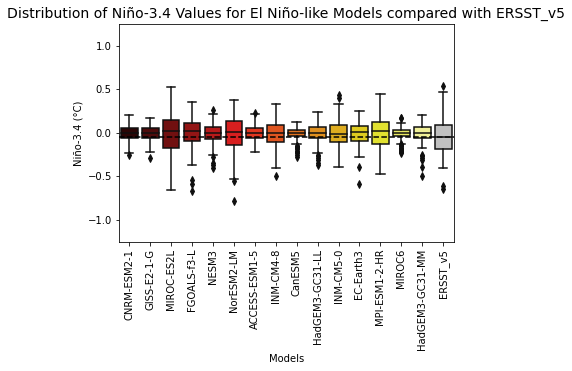

In [41]:
nino_en_box = sns.boxplot(data = el_nino_models.T, palette = 'hot')
nino_en_box.set_ybound(-1.25,1.25)
nino_en_box.axhline(np.nanmedian(el_nino_models.T['ERSST_v5']), ls = '--', color = 'k')
nino_en_box.set_title('Distribution of Niño-3.4 Values for El Niño-like Models compared with ERSST_v5', 
                     size = 14, loc = 'center')
#nino_en_box.set_title('Niño-3.4 Distributions for El Niño-like Models', 
#                     size = 14, loc = 'center')
nino_en_box.set_xticklabels(nino_en_box.get_xticklabels(),rotation = 90)
nino_en_box.set(xlabel = 'Models', ylabel = 'Niño-3.4 (°C)')
ersst_box = nino_en_box.patches[len(el_nino_models)-1]
ersst_box.set_facecolor('silver')

fig_dir = '/home/nathane1/Thesis/paper_images'
os.chdir(fig_dir)

nino_en_fig = nino_en_box.get_figure()
nino_en_fig.savefig('nino_en_boxplot.jpg', bbox_inches = 'tight')

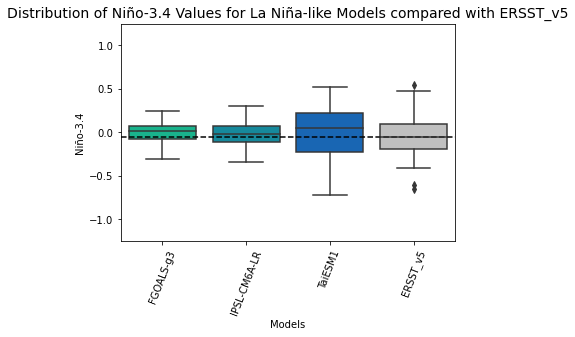

In [37]:
nino_ln_box = sns.boxplot(data = la_nina_models.T, palette = 'winter_r')
nino_ln_box.set_ybound(-1.25,1.25)
nino_ln_box.axhline(np.nanmedian(la_nina_models.T['ERSST_v5']), ls = '--', color = 'k')
nino_ln_box.set_title('Distribution of Niño-3.4 Values for La Niña-like Models compared with ERSST_v5', 
                     size = 14, loc = 'center')
nino_ln_box.set_xticklabels(nino_ln_box.get_xticklabels(),rotation = 69)
nino_ln_box.set(xlabel = 'Models', ylabel = 'Niño-3.4')
ersst_box = nino_ln_box.patches[len(la_nina_models)-1]
ersst_box.set_facecolor('silver')

fig_dir = '/home/nathane1/Thesis/paper_images'
os.chdir(fig_dir)

nino_ln_fig = nino_ln_box.get_figure()
#nino_ln_fig.savefig('nino_ln_boxplot.jpg', bbox_inches = 'tight')

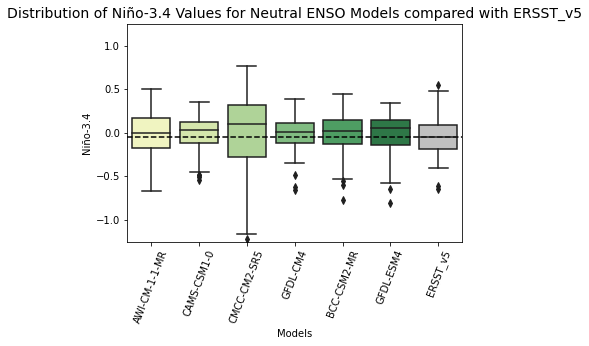

In [40]:
nino_neutral_box = sns.boxplot(data = neutral_models.T, palette = 'YlGn')
nino_neutral_box.set_ybound(-1.25,1.25)
nino_neutral_box.axhline(np.nanmedian(neutral_models.T['ERSST_v5']), ls = '--', color = 'k')
nino_neutral_box.set_title('Distribution of Niño-3.4 Values for Neutral ENSO Models compared with ERSST_v5', 
                     size = 14, loc = 'center')
nino_neutral_box.set_xticklabels(nino_neutral_box.get_xticklabels(),rotation = 69)
nino_neutral_box.set(xlabel = 'Models', ylabel = 'Niño-3.4')
ersst_box = nino_neutral_box.patches[len(neutral_models)-1]
ersst_box.set_facecolor('silver')

fig_dir = '/home/nathane1/Thesis/paper_images'
os.chdir(fig_dir)

nino_neutral_fig = nino_neutral_box.get_figure()
#nino_neutral_fig.savefig('nino_neutral_boxplot.jpg', bbox_inches = 'tight')